## Reprojection

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Import countries polygons
fp = os.path.join('/Users/marietolteca/Documents/MEDS/EDS-220/eds220-2025-in-class/data/week6/ne_50m_admin_0_countries.shp')
countries = gpd.read_file(fp)

# Simplify column names
countries.columns = countries.columns.str.lower()

# Select columns for analysis
countries = countries[['admin', 'type', 'geometry']]

countries.head()

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,Sovereign country,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,Sovereign country,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [2]:
# Import country names from URL
URL = 'https://raw.githubusercontent.com/MEDS-eds-220/MEDS-eds-220-course/refs/heads/main/book/chapters/lesson-12-merge-data/country_names.csv'
country_names = pd.read_csv(URL)
country_names.head()

,country,admin
0,RU,Russia
1,LV,Latvia
2,EE,Estonia
3,LT,Lithuania
4,SE,Sweden


In [3]:
# Import Arctic communities GeoJSON directly from URL - Have Polygons for communites
URL = 'https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4'
communities = gpd.read_file(URL)
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


The CRS. of the `communities` geodataframe is EPSG:4326 because all GeoJSON files are given in this CRS

In [4]:
communities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
communities.crs == communities.crs

True

# Since the CRS's match, we can plot them together

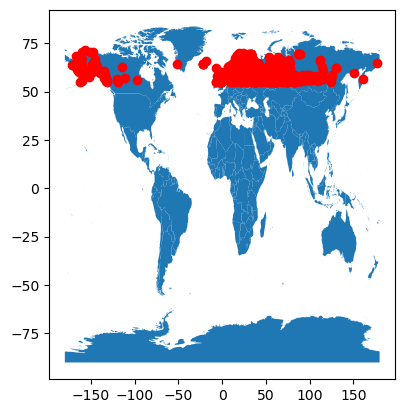

In [6]:
fig, ax = plt.subplots()
countries.plot(ax=ax)
communities.plot(ax=ax, color = 'red')
plt.show()

## Artic communities by country        

In [7]:
# Number of Artic communities by country
n_comms = communities.groupby('country').size().reset_index(name='n_communities')

n_comms

,country,n_communities
0,AX,1
1,BY,8
2,CA,7
3,DK,72
4,EE,14
5,FI,98
6,FO,1
7,GB,96
8,GL,1
9,IS,5


## `if-else` statements

Our goal is to merge `n_comms` per country with the `countries` geometries: to merge them, we want them to have at least one column in common.

In [8]:
# Transform country column and 
set(countries.columns).intersection(n_comms.columns)

set()

In [9]:
common_columns = set(countries.columns).intersection(n_comms.columns)

# Check if there are any common columns
if len(common_columns) != 0:
    print(f"Common columns: {common_columns}")
else:
    print("No columns in common.")

No columns in common.


## Check in

Wrap up the previous code into a function called `check_common_columns` that prints a message depending on whether two general dataframes have column names in common.

CMD + ] : indent to the right
CMD + [ : indent to the left
CMD + / : comment code out
ex: 
```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [10]:
def check_common_columns(df1,df2):
    """
    Prints a message depending on whether df1 and df2 have columns in common.
    """
    # New variables: df1, df2
    common_columns = set(df1.columns).intersection(df2.columns)

    # Check if there are any common columns
    if len(common_columns) != 0:
        print(f"Common columns: {common_columns}")
    else:
        print("No columns in common.")

In [11]:
?check_common_columns
# docstring is on there

Signature: check_common_columns(df1, df2)
Docstring: Prints a message depending on whether df1 and df2 have columns in common.
File:      /var/folders/jm/6bxxbqpx4zz8l9gvxj_nz44m0000gn/T/ipykernel_59722/1362284678.py
Type:      function

In [12]:
check_common_columns(countries, communities)

Common columns: {'geometry'}


## Merging Data Frames

We want to:

1. Use the `country_names` data frame to add the country names to the `n_comms` data.
2. merge the resulting dataframe with `country_names`.

To merge dataframes we can use `pandas.merge()` function:
```python
output_df = df.merge(left_df,               # df "on the left side"
                    right_df,               # df "on the right side"
                    how = type_of_join,     # Type of join, default = inner join
                    on = column_to_join)    # which column to join on, must be in both dataframes
```


In [13]:
n_comms = pd.merge(n_comms,
                   country_names,
                   how = 'left',
                   on = 'country')
                   

In [14]:
n_comms

,country,n_communities,admin
0,AX,1,Aland Islands
1,BY,8,Belarus
2,CA,7,Canada
3,DK,72,Denmark
4,EE,14,Estonia
5,FI,98,Finland
6,FO,1,Faroe Islands
7,GB,96,United Kingdom
8,GL,1,Greenland
9,IS,5,Iceland


In [15]:
check_common_columns(n_comms, countries)

Common columns: {'admin'}


## check-in

Create a new variable called `arctic_countries` which is the result of an inner join between our `countries` and `n_comms` dataframes

In [16]:
check_common_columns(n_comms, countries)

Common columns: {'admin'}


In [28]:
arctic_countries = pd.merge(countries,
                   n_comms,
                   how = 'inner',            # Keep rows with matches in both dataframes
                   on = 'admin')

In [29]:
arctic_countries


,admin,type,geometry,country,n_communities
0,United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
1,United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
2,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
3,Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
4,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
5,Lithuania,Sovereign country,"MULTIPOLYGON (((20.95781 55.27891, 20.89980 55...",LT,26
6,Latvia,Sovereign country,"POLYGON ((26.59355 55.66753, 26.54287 55.67241...",LV,25
7,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
8,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
9,Estonia,Sovereign country,"MULTIPOLYGON (((27.35195 57.52812, 27.32656 57...",EE,14


## By checking the result, we notice we lost the Aland Islands. Let's double check it

In [30]:
# Update index
arctic_countries = arctic_countries.set_index('admin')
arctic_countries.head()

,type,geometry,country,n_communities
admin,,,,
United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48


In [31]:
# Check Aland Island is nowhere in dataframe
'Aland Island' in arctic_countries.values

False

The Aland Island is an autonomus region of Finland and there is one Arctic community registered in this region.
We will directly add one to Finland to account for this.

In [32]:
arctic_countries.at['Finland', 'n_communities']

98

In [33]:
arctic_countries.at['Finland', 'n_communities'] +=1

In [34]:
arctic_countries.at['Finland', 'n_communities']

99

## Choropleth map

To make a map we just need to speicy the `column` parameter in `plot()` and make it equal to the column with the values we want to plot in each country

<Axes: >

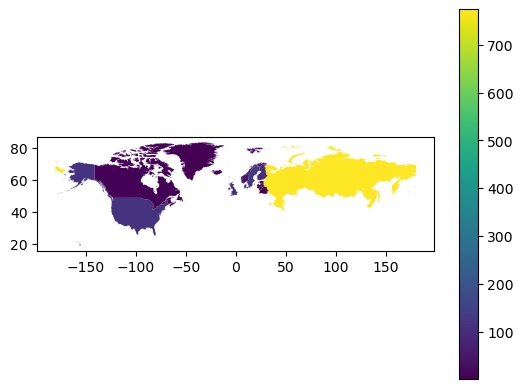

In [35]:
arctic_countries.plot(column = 'n_communities',
                      legend = True)

## Reprojecting

`crs_to` Method for `geopandas.DataFrame`

```python

updated_geodf = geodf.to_crs(new_crs)
```

here `new_crs` is the CRS we want to convert to, this is an object of type CRS or a string representing the CRS

In [39]:
# Reproject to CRS optimized for Arctic region
arctic_countries = arctic_countries.to_crs('epsg: 3413')

<Axes: >

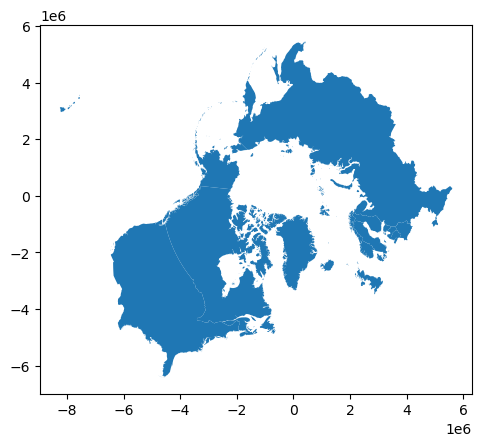

In [40]:
arctic_countries.plot()

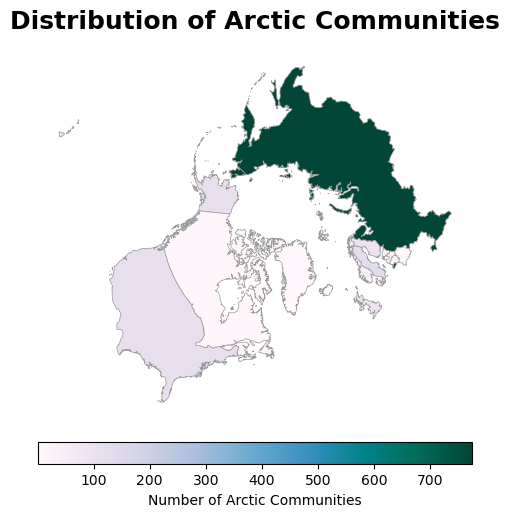

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
arctic_countries.plot(
    ax=ax,
    column='n_communities',
    # Color map - purple, blue, green
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()